In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as st
import math
import matplotlib
import matplotlib.pyplot as plt

# Problem 4.2

In [2]:
dataFrame = pd.read_csv('./usair.csv')
dataColumns = list(dataFrame.columns)
dataColumns

['SO2', 'temp', 'mfgfirms', 'popn', 'wind', 'precip', 'raindays']

In [3]:
dataFrame

SO2  temp  mfgfirms  popn  wind  precip  raindays
0    10  70.3       213   582   6.0    7.05        36
1    13  61.0        91   132   8.2   48.52       100
2    12  56.7       453   716   8.7   20.66        67
3    17  51.9       454   515   9.0   12.95        86
4    56  49.1       412   158   9.0   43.37       127
5    36  54.0        80    80   9.0   40.25       114
6    29  57.3       434   757   9.3   38.89       111
7    14  68.4       136   529   8.8   54.47       116
8    10  75.5       207   335   9.0   59.80       128
9    24  61.5       368   497   9.1   48.34       115
10  110  50.6      3344  3369  10.4   34.44       122
11   28  52.3       361   746   9.7   38.74       121
12   17  49.0       104   201  11.2   30.85       103
13    8  56.6       125   277  12.7   30.58        82
14   30  55.6       291   593   8.3   43.11       123
15    9  68.3       204   361   8.4   56.77       113
16   47  55.0       625   905   9.6   41.31       111
17   35  49.9      1064  1513  10.1   30.96       129
18   29  43.5       699   744  10.6   25.94       137
19   14  54.5       381   507  10.0   37.00        99
20   56  55.9       775   622   9.5   35.89       105
21   14  51.5       181   347  10.9   30.18        98
22   11  56.8        46   244   8.9    7.77        58
23   46  47.6        44   116   8.8   33.36       135
24   11  47.1       391   463  12.4   36.11       166
25   23  54.0       462   453   7.1   39.04       132
26   65  49.7      1007   751  10.9   34.99       155
27   26  51.5       266   540   8.6   37.01       134
28   69  54.6      1692  1950   9.6   39.93       115
29   61  50.4       347   520   9.4   36.22       147
30   94  50.0       343   179  10.6   42.75       125
31   10  61.6       337   624   9.2   49.10       105
32   18  59.4       275   448   7.9   46.00       119
33    9  66.2       641   844  10.9   35.94        78
34   10  68.9       721  1233  10.8   48.19       103
35   28  51.0       137   176   8.7   15.17        89
36   31  59.3        96   308  10.6   44.68       116
37   26  57.8       197   299   7.6   42.59       115
38   29  51.1       379   531   9.4   38.79       164
39   31  55.2        35    71   6.5   40.75       148
40   16  45.7       569   717  11.8   29.07       123

In [11]:
dataArray = np.array(dataFrame)

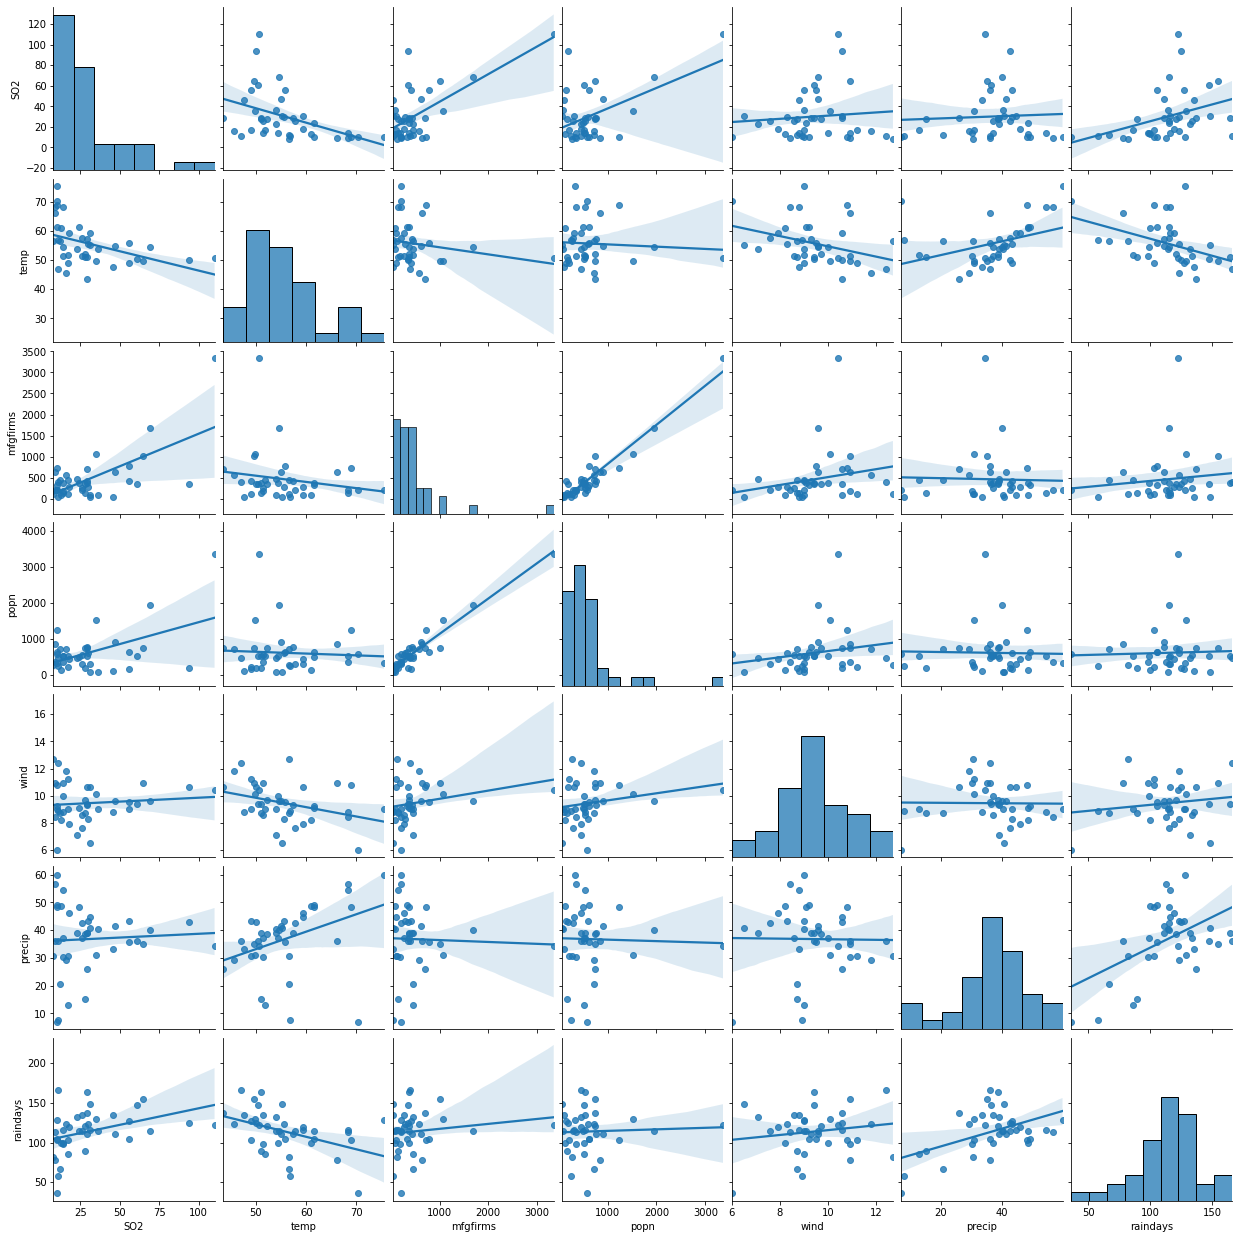

In [12]:
sns_plot = sns.pairplot(dataFrame, kind="reg")

In [14]:
sns_plot.savefig("scattorMatrix.png")

In [4]:
dataFrameLog = np.log(dataFrame)

In [16]:
sns_plot = sns.pairplot(dataFrameLog, kind="reg")

In [17]:
sns_plot.savefig("scattorMatrixLog.png")

# log 前後的解釋

# 6 predictor variables are most highly correlated with the logged response SO2

In [5]:
dataFrameLogArray = np.array(dataFrameLog)

In [6]:
correlations = np.corrcoef(dataFrameLogArray.T)

In [8]:
# SO2 跟其他變數的 correlations
correlations[0, :]

array([ 1.        , -0.53494664,  0.33816212,  0.1004838 ,  0.02392858,
        0.17176568,  0.47940048])

In [7]:
correlations

array([[ 1.        , -0.53494664,  0.33816212,  0.1004838 ,  0.02392858,
         0.17176568,  0.47940048],
       [-0.53494664,  1.        , -0.16273837,  0.04104755, -0.36967805,
         0.15361464, -0.43310347],
       [ 0.33816212, -0.16273837,  1.        ,  0.8658788 ,  0.33089519,
         0.12521909,  0.1720413 ],
       [ 0.1004838 ,  0.04104755,  0.8658788 ,  1.        ,  0.28159422,
         0.00419081, -0.01348505],
       [ 0.02392858, -0.36967805,  0.33089519,  0.28159422,  1.        ,
         0.17396821,  0.2523423 ],
       [ 0.17176568,  0.15361464,  0.12521909,  0.00419081,  0.17396821,
         1.        ,  0.71217086],
       [ 0.47940048, -0.43310347,  0.1720413 , -0.01348505,  0.2523423 ,
         0.71217086,  1.        ]])

# Problem 5.13

# Perform the Shapiro-Wilk test for normality.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as st
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_csv('./har1.csv')
#dataFrame

In [ ]:
# D = pre - post
# H0: D is normal 
# H1: no H0

In [3]:
D = np.array(dataFrame).T[0, :] - np.array(dataFrame).T[1, :]
pre_post = st.shapiro(D)

In [4]:
pre_post.statistic, pre_post.pvalue

(0.9600312113761902, 0.10125274211168289)

In [51]:
# p-value 大於 0.05 不拒絕資料為常態分佈

In [ ]:
# H0: D <= 0
# H1: D > 0

In [5]:
t = st.ttest_1samp(D, 0.0, alternative='greater')

In [6]:
t

Ttest_1sampResult(statistic=3.556373866844467, pvalue=0.0004352849275959848)

In [ ]:
# D 的 p-value 大於 0.05 不拒絕資料 D = pre - post 

In [ ]:
# qqplot

In [7]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats

In [28]:
fig = sm.qqplot(D, stats.t, distargs=(5,), fit=False, line="45")
plt.show()

In [29]:
fig.savefig('qqplot.png')